# Criando uma apresentação executiva
- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


In [3]:
# Importando as bibliotecas

import calendar
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Data Frame

BASE_CSV = r"dados/Criando uma apresentação executiva.csv"
base = pd.read_csv(BASE_CSV) 

base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# Visualizando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Verificando os registros com Postal Code vazio

base[base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code 

base[['State', 'City', 'Postal Code']].loc[base['State'] == 'Vermont']

,State,City,Postal Code
2234,Vermont,Burlington,NaN
5274,Vermont,Burlington,NaN
8798,Vermont,Burlington,NaN
9146,Vermont,Burlington,NaN
9147,Vermont,Burlington,NaN
9148,Vermont,Burlington,NaN
9386,Vermont,Burlington,NaN
9387,Vermont,Burlington,NaN
9388,Vermont,Burlington,NaN
9389,Vermont,Burlington,NaN


In [8]:
# Atualizando essa informação

base.loc[base['State'] == 'Vermont', 'Postal Code']  = 5401
base['Postal Code'] = base['Postal Code'].astype('object')

base[['State', 'City', 'Postal Code']].loc[base['State'] == 'Vermont']


,State,City,Postal Code
2234,Vermont,Burlington,5401.0
5274,Vermont,Burlington,5401.0
8798,Vermont,Burlington,5401.0
9146,Vermont,Burlington,5401.0
9147,Vermont,Burlington,5401.0
9148,Vermont,Burlington,5401.0
9386,Vermont,Burlington,5401.0
9387,Vermont,Burlington,5401.0
9388,Vermont,Burlington,5401.0
9389,Vermont,Burlington,5401.0


In [9]:
# Verificando se ainda existe algum valor nulo
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
base['Order Date'].unique()

array(['08/11/2017', '12/06/2017', '11/10/2016', ..., '18/06/2015',
       '28/02/2018', '09/05/2016'], dtype=object)

In [11]:
# Formatando Datas

base['Order Date'] = pd.to_datetime(base['Order Date'], format = "%d/%m/%Y")
base['Ship Date'] = pd.to_datetime(base['Ship Date'], format = "%d/%m/%Y")

In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [13]:
base['Order Date'].min()

Timestamp('2015-01-03 00:00:00')

In [14]:
base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

# Venda por ano

In [17]:
# Criando uma coluna com o ano

base['Year'] = base['Order Date'].dt.year

In [18]:
# Usando essa coluna no group by e criando um plot de barras

base_agrp = base.groupby('Year')['Sales'].sum().to_frame()
base_agrp

,Sales
Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


In [19]:
base_agrp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 2015 to 2018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   4 non-null      float64
dtypes: float64(1)
memory usage: 48.0 bytes


<Axes: xlabel='Year'>

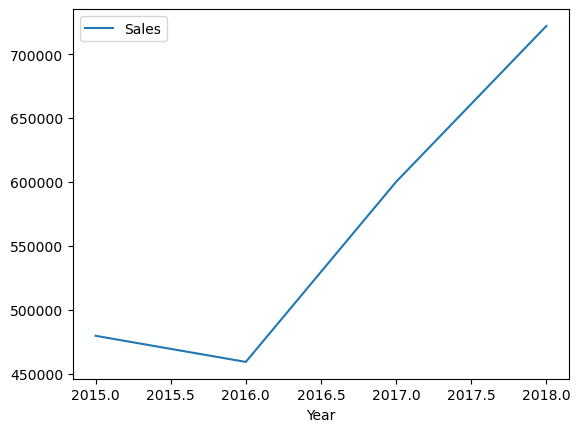

In [20]:
base_agrp.plot()

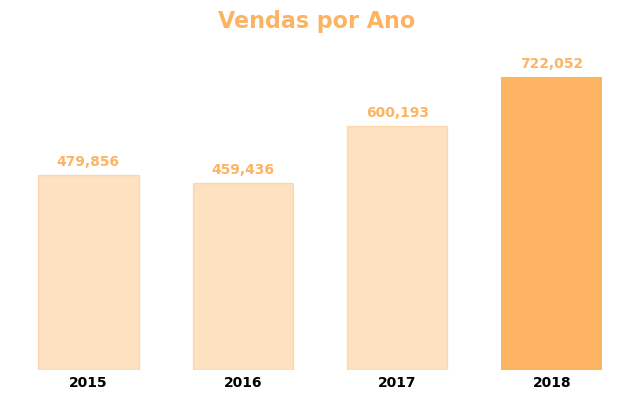

In [21]:
cores = plt.cm.Set3.colors # alterando o ciclo de cores

fig = plt.figure(figsize = (8,4))
axs =  fig.subplot_mosaic('A')

barras = axs['A'].bar(base_agrp.index, base_agrp['Sales'], color = cores[5], width = 0.65)

axs['A'].set_title("Vendas por Ano \n",fontsize=16,fontweight='bold',color=cores[5])

rotulos =  [f"{venda:,.0f}" for venda in base_agrp['Sales']]
axs['A'].bar_label(barras, labels= rotulos, label_type='edge', padding= 5, fontweight = 'bold', color = cores[5])


# eixos 

anos = [2015,2016,2017,2018]

axs['A'].xaxis.set_ticks(anos)
axs['A'].set_xticklabels(labels = anos, fontweight = 'bold', fontsize = 10)
axs['A'].tick_params(axis = 'x', length = 0)

axs['A'].yaxis.set_visible(False)

# barras 

for i in range(3):
    barras[i].set_color(cores[5])
    barras[i].set_alpha(0.4)

axs['A'].grid(True, axis= 'y', color = 'Darkgray', alpha = 0.8)

axs['A'].set_frame_on(False)


plt.show()

In [22]:
base['Month'] = base['Order Date'].dt.month
# Usando essa coluna no group by e criando um plot de barras

base_agrp_mes = base.groupby(['Year', 'Month'])['Sales'].sum().to_frame()

In [23]:
base_agrp_mes.index[0]

(2015, 1)

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [25]:
base_agrp_mes = base_agrp_mes.reset_index()

In [26]:
base_agrp_mes.head()

,Year,Month,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


In [27]:
base_agrp_mes.shape

(48, 3)

In [28]:
base_agrp_mes['Month'].unique()
meses_numericos =base_agrp_mes['Month'].unique()
meses_numericos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
base_agrp_mes['N Month'] = base_agrp_mes['Month']

In [30]:
meses = [calendar.month_abbr[mes] for mes in base_agrp_mes['Month'].unique()]

In [31]:
for mes in base_agrp_mes['Month']:
    nome_mes = calendar.month_abbr[mes]
    base_agrp_mes['Month'] = base_agrp_mes['Month'].replace(mes, nome_mes)
    

In [32]:
base_agrp_mes.tail().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 43 to 47
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     5 non-null      int32  
 1   Month    5 non-null      object 
 2   Sales    5 non-null      float64
 3   N Month  5 non-null      int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 252.0+ bytes


In [33]:
df = base_agrp_mes.loc[base_agrp_mes['Year'] == 2015]
df

,Year,Month,Sales,N Month
0,2015,Jan,14205.7070,1
1,2015,Feb,4519.8920,2
2,2015,Mar,55205.7970,3
3,2015,Apr,27906.8550,4
4,2015,May,23644.3030,5
5,2015,Jun,34322.9356,6
6,2015,Jul,33781.5430,7
7,2015,Aug,27117.5365,8
8,2015,Sep,81623.5268,9
9,2015,Oct,31453.3930,10


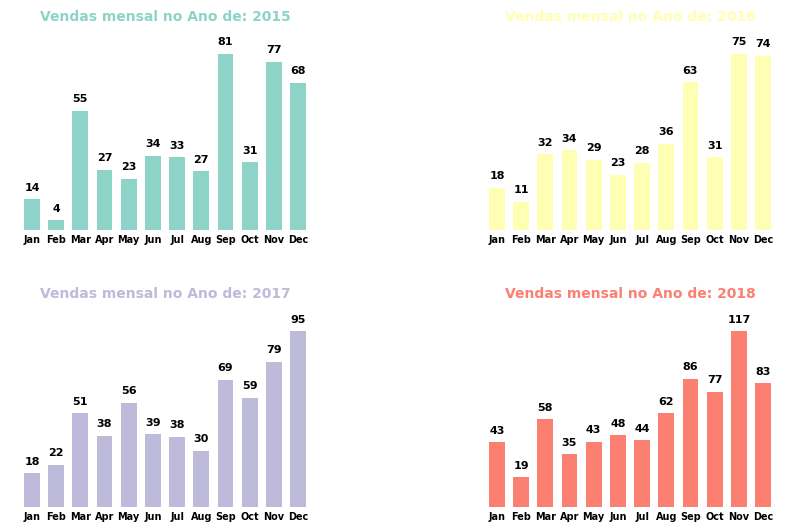

In [34]:
cores = plt.cm.Set3.colors # alterando o ciclo de cores

espacamento = {'wspace': 0.5, 'hspace': 0.5}

mosaico_orgin = 'AB;CD'
mosaico = 'ABCD'

fig = plt.figure(figsize = (10,6))
axs =  fig.subplot_mosaic(mosaico_orgin, gridspec_kw= espacamento)

for i, grafico in enumerate(mosaico):

    df = base_agrp_mes.loc[base_agrp_mes['Year'] == anos[i]]
    barras = axs[grafico].bar(df['Month'], df['Sales'], color = cores[i], width = 0.65)

    axs[grafico].set_title(f"Vendas mensal no Ano de: {anos[i]}\n",fontsize=10,fontweight='bold',color=cores[i])
    
    rotulos =  [f"{venda:,.0f}".split(',')[0] for venda in df['Sales']]
    axs[grafico].bar_label(barras, labels= rotulos, label_type='edge', padding= 5, fontweight = 'bold', color = 'black', fontsize = 8)


    # eixos 
    
    axs[grafico].xaxis.set_ticks(meses)
    axs[grafico].set_xticklabels(labels = meses, fontweight = 'bold', fontsize = 7)
    axs[grafico].tick_params(axis = 'x', length = 0)
    
    axs[grafico].yaxis.set_visible(False)
    
    # barras 

    axs[grafico].set_frame_on(False)
    
    
plt.show()

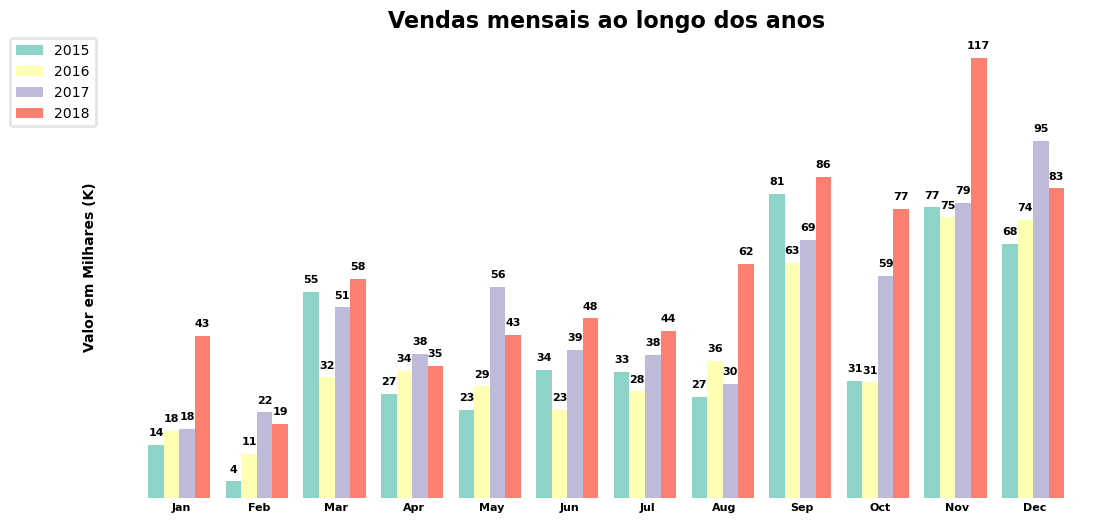

In [35]:
cores = plt.cm.Set3.colors # alterando o ciclo de cores

espacamento = {'wspace': 0.5, 'hspace': 0.5}

desloc = np.array([-0.65, -0.25, 0.15, 0.55])

mosaico = 'ABCD' 

fig = plt.figure(figsize = (13,6))
axs =  fig.subplot_mosaic('A', gridspec_kw= espacamento)

for i, grafico in enumerate(mosaico):

    df = base_agrp_mes.loc[base_agrp_mes['Year'] == anos[i]]

    barras = axs['A'].bar(df['N Month'] + desloc[i]/2, df['Sales'], color = cores[i], width = 0.2, label = anos[i])

    rotulos =  [f"{venda:,.0f}".split(',')[0] for venda in df['Sales']]
    axs['A'].bar_label(barras, labels= rotulos, label_type='edge', padding= 5, fontweight = 'bold', color = 'black', fontsize = 8)

axs['A'].set_title("Vendas mensais ao longo dos anos", fontsize=16 ,fontweight='bold',color= 'black')


# eixos 

axs['A'].xaxis.set_ticks(meses_numericos)
axs['A'].set_xticklabels(labels = meses, fontweight = 'bold', fontsize = 8)
axs['A'].tick_params(axis = 'both', length = 0)

axs['A'].set_ylabel('Valor em Milhares (K)', color = 'black',fontweight = 'bold')
axs['A'].set_yticks([])

# barras 

axs['A'].set_frame_on(False)

legenda = axs['A'].legend(loc='upper right', bbox_to_anchor=(0, 1.01)).get_frame()



legenda.set_facecolor('white')  # Cor de fundo
legenda.set_linewidth(2)  # Largura da borda
legenda.set_alpha(0.5)   # Transparência
    
plt.show()

In [36]:
# groupby da categoria

df_categoria = base.groupby('Category')['Sales'].sum().to_frame().reset_index()

df_categoria

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**

In [38]:
# Agrupando por ano e categoria

df_categoria_ano = base.groupby(['Category', 'Year'])['Sales'].sum().to_frame().reset_index()

df_categoria_ano

,Category,Year,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


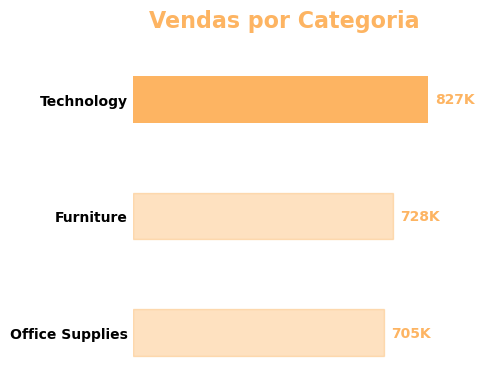

In [39]:
    cores = plt.cm.Set3.colors # alterando o ciclo de cores
    
    fig = plt.figure(figsize = (4,4))
    axs =  fig.subplot_mosaic('A')
    
    df_categoria = df_categoria.sort_values(by = 'Sales')
    barras = axs['A'].barh(df_categoria['Category'], df_categoria['Sales'], color = cores[5] , height=0.4)
    
    axs['A'].set_title("Vendas por Categoria \n",fontsize=16,fontweight='bold',color=cores[5])
    
    rotulos =  [f"{venda:,.0f}".split(',')[0] + "K"   for venda in df_categoria['Sales']]
    axs['A'].bar_label(barras, labels= rotulos, label_type='edge', padding= 5, fontweight = 'bold', color = cores[5])
    
    
    # eixos 
    
    axs['A'].yaxis.set_ticks(df_categoria['Category'])
    axs['A'].set_yticklabels(labels = df_categoria['Category'], fontweight = 'bold', fontsize = 10)
    axs['A'].tick_params(axis = 'both', length = 0)
    
    axs['A'].xaxis.set_visible(False)
    
    # barras 
    
    for i in range(2):
    
        barras[i].set_color(cores[5])
        barras[i].set_alpha(0.4)
    
    # axs['A'].grid(True, axis= 'x', color = 'Darkgray', alpha = 0.1)
    
    axs['A'].set_frame_on(False)
    
    
    plt.show()

In [40]:
df_categoria_ano.sort_index

<bound method DataFrame.sort_index of            Category  Year        Sales
0         Furniture  2015  156477.8811
1         Furniture  2016  164053.8674
2         Furniture  2017  195813.0400
3         Furniture  2018  212313.7872
4   Office Supplies  2015  149512.8200
5   Office Supplies  2016  133124.4070
6   Office Supplies  2017  182417.5660
7   Office Supplies  2018  240367.5410
8        Technology  2015  173865.5070
9        Technology  2016  162257.7310
10       Technology  2017  221961.9440
11       Technology  2018  269370.6910>

In [41]:
df_categoria_ano.loc[df_categoria_ano['Category'] == df_categoria_ano['Category'].unique()[0]]

,Category,Year,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872


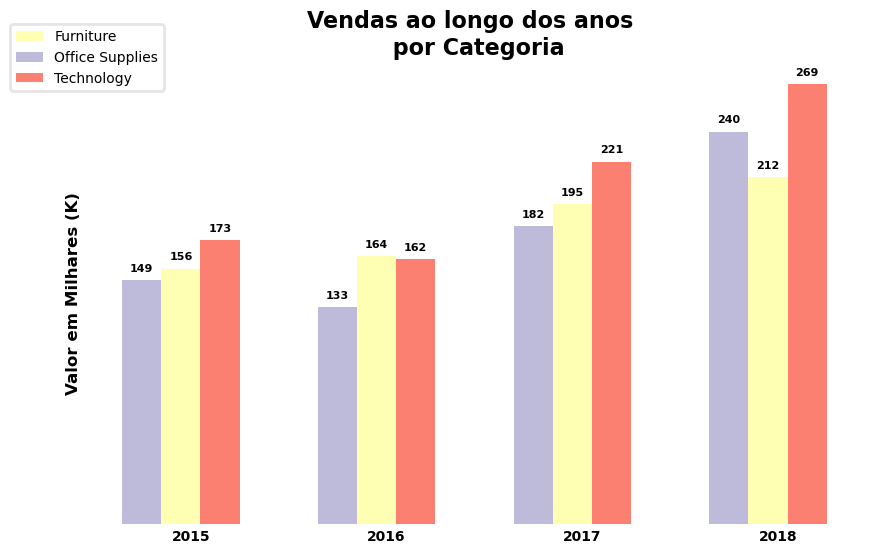

In [42]:
cores = plt.cm.Set3.colors # alterando o ciclo de cores

espacamento = {'wspace': 0.5, 'hspace': 0.5}

desloc = np.array([-0.05, -0.25, 0.15])

mosaico = 'ABC' 

fig = plt.figure(figsize = (10,6))
axs =  fig.subplot_mosaic('A', gridspec_kw= espacamento)

for i, grafico in enumerate(mosaico):

    categoria = df_categoria_ano['Category'].unique()[i]
    df = df_categoria_ano.loc[df_categoria_ano['Category'] == categoria]

    barras = axs['A'].bar(df['Year'] + desloc[i], df['Sales'], color = cores[i+1], width = 0.2, label = categoria)

    rotulos =  [f"{venda:,.0f}".split(',')[0] for venda in df['Sales']]
    axs['A'].bar_label(barras, labels= rotulos, label_type='edge', padding= 5, fontweight = 'bold', color = 'black', fontsize = 8)

axs['A'].set_title("Vendas ao longo dos anos \n por Categoria", fontsize=16 ,fontweight='bold',color= 'black')


# eixos 

axs['A'].xaxis.set_ticks(anos)
axs['A'].set_xticklabels(labels = anos, fontweight = 'bold', fontsize = 10)
axs['A'].tick_params(axis = 'both', length = 0)

axs['A'].set_ylabel('Valor em Milhares (K)', color = 'black',fontweight = 'bold', fontsize = 12)
axs['A'].set_yticks([])


axs['A'].set_frame_on(False)

legenda = axs['A'].legend(loc='center', bbox_to_anchor=(0, 1.01)).get_frame()



legenda.set_facecolor('white')  # Cor de fundo
legenda.set_linewidth(2)  # Largura da borda
legenda.set_alpha(0.5)   # Transparência

    
plt.show()

In [43]:
base.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month'],
      dtype='object')

In [44]:
# Análises SKU - top 10 itens mais vendidos

df_sku_10 = (base.groupby('Product ID')['Sales'].sum()).sort_values(ascending= False).to_frame().reset_index().head(10)

df_sku_10.head(1)

,Product ID,Sales
0,TEC-CO-10004722,61599.824


In [45]:
from Funções import reset_index_from_one

df_sku_10 =reset_index_from_one(df_sku_10, drop = True)
df_sku_10

   A  B
1  1  4
2  2  5
3  3  6


,Product ID,Sales
1,TEC-CO-10004722,61599.824
2,OFF-BI-10003527,27453.384
3,TEC-MA-10002412,22638.480
4,FUR-CH-10002024,21870.576
5,OFF-BI-10001359,19823.479
6,OFF-BI-10000545,19024.500
7,TEC-CO-10001449,18839.686
8,TEC-MA-10001127,18374.895
9,OFF-BI-10004995,17965.068
10,OFF-SU-10000151,17030.312


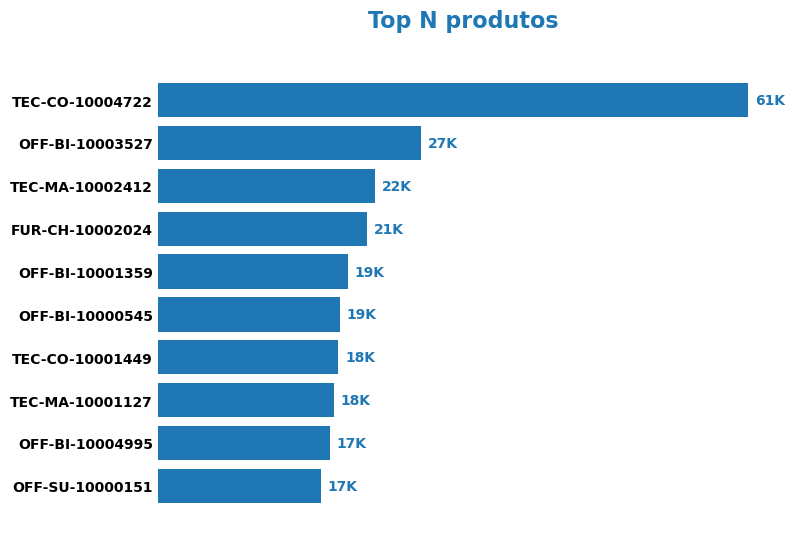

In [46]:
cores = plt.cm.Paired.colors # alterando o ciclo de cores

fig = plt.figure(figsize = (8,6))
axs =  fig.subplot_mosaic('A')

barras = axs['A'].barh(df_sku_10['Product ID'], df_sku_10['Sales'], color = cores[1] , height=0.8)

axs['A'].set_title("Top N produtos \n",fontsize=16,fontweight='bold',color=cores[1])

rotulos =  [f"{venda:,.0f}".split(',')[0] + "K"   for venda in df_sku_10['Sales']]
axs['A'].bar_label(barras, labels= rotulos, label_type='edge', padding= 5, fontweight = 'bold', color = cores[1])


# eixos 

axs['A'].yaxis.set_ticks(df_sku_10['Product ID'])
axs['A'].set_yticklabels(labels = df_sku_10['Product ID'], fontweight = 'bold', fontsize = 10)
axs['A'].tick_params(axis = 'both', length = 0)

axs['A'].invert_yaxis()

axs['A'].xaxis.set_visible(False)

# axs['A'].grid(True, axis= 'x', color = 'Darkgray', alpha = 0.1)

axs['A'].set_frame_on(False)


plt.show()

In [47]:
df_datas = pd.DataFrame(
    {
        'Year': [2018,2017,2016,2015],
        'On' : 'On'
    }
)
df_datas

#df_sku_10 = (base.groupby(['Product ID', 'Year'])['Sales'].sum()).sort_values(ascending= False).to_frame().reset_index().head(10)
df_datas

,Year,On
0,2018,On
1,2017,On
2,2016,On
3,2015,On


In [48]:
df_sku_10['On'] = 'On'

In [49]:
df_on = pd.merge(
    df_sku_10,
    df_datas,
    on = 'On',
    how = 'outer'
)

In [50]:
df_on.head(1)

,Product ID,Sales,On,Year
0,TEC-CO-10004722,61599.824,On,2018


In [51]:

df_sku_ano = (base.groupby(['Product ID','Year'])['Sales'].sum()).sort_values(ascending= False).to_frame().reset_index()

df_sku_ano

,Product ID,Year,Sales
0,TEC-CO-10004722,2018,35699.898
1,TEC-CO-10004722,2017,25899.926
2,TEC-MA-10002412,2015,22638.480
3,OFF-BI-10003527,2016,15760.276
4,OFF-BI-10000545,2017,12860.562
...,...,...,...
5310,OFF-BI-10001267,2015,1.234
5311,OFF-BI-10000591,2015,1.167
5312,OFF-BI-10000494,2015,1.044
5313,OFF-BI-10000201,2016,0.984


In [52]:
df_on_final = pd.merge(
    df_on,
    df_sku_ano,
    on = ['Year','Product ID'],
    how = 'left'
)

In [53]:
df_on_final = df_on_final.drop(columns = ['On', 'Sales_x'])

In [54]:
df_on_final = df_on_final.rename(columns = { 'Sales_y': 'Sales' })

In [55]:
df_on_final = df_on_final.sort_values(by = 'Sales', ascending = False)

In [56]:
df_on_final['Product ID'].nunique()

10

In [62]:
df_sku_10

,Sales,On
Product ID,,
TEC-CO-10004722,61599.824,On
OFF-BI-10003527,27453.384,On
TEC-MA-10002412,22638.480,On
FUR-CH-10002024,21870.576,On
OFF-BI-10001359,19823.479,On
OFF-BI-10000545,19024.500,On
TEC-CO-10001449,18839.686,On
TEC-MA-10001127,18374.895,On
OFF-BI-10004995,17965.068,On


In [84]:
import warnings

# Suprimindo todos os avisos
warnings.filterwarnings('ignore')

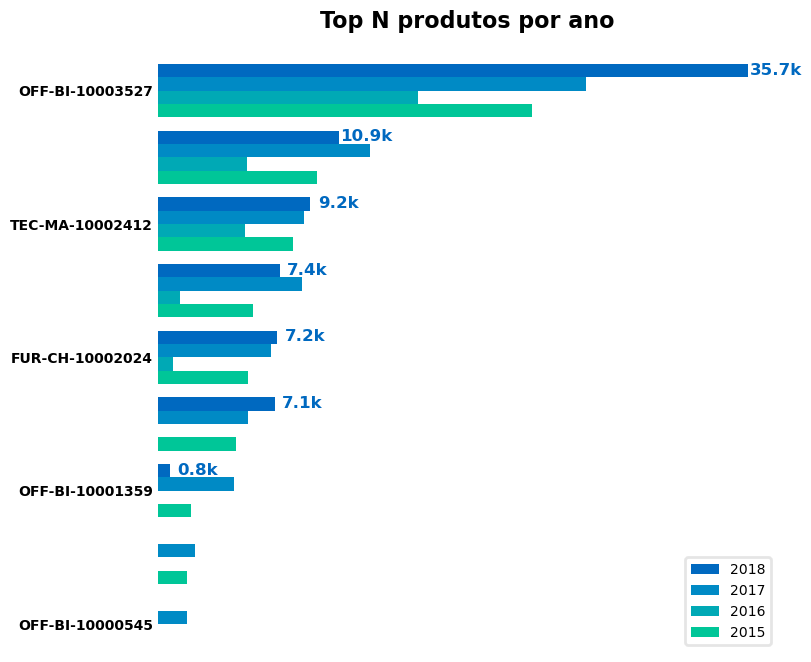

In [86]:
# Vamos criar o gráfico baseado nesse DataFrame
fig,ax = plt.subplots(
            figsize = (8,8)
        )

hgt = 0.2

qtd_itens = 10

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        df_on_final[df_on_final.Year == 2018].Sales.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )

ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        df_on_final[df_on_final.Year == 2017].Sales.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")


ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        df_on_final[df_on_final.Year == 2016].Sales.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")


ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        df_on_final[df_on_final.Year == 2015].Sales.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")


ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(df_on_final[df_on_final.Year == 2018].Sales.values[i]/1000), 
                (df_on_final[df_on_final.Year == 2018].Sales.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis = 'both', length = 0)


legenda = ax.legend(loc='lower right').get_frame()

ax.set_yticklabels(labels = df_sku_10.index, fontweight = 'bold', fontsize = 10)


legenda.set_facecolor('white')  # Cor de fundo
legenda.set_linewidth(2)  # Largura da borda
legenda.set_alpha(0.5)   # Transparência

   
ax.set_title("Top N produtos por ano",fontsize=16,fontweight='bold',color='black')


plt.show()